# Imports

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---
from shared import *

In [87]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Constants

In [88]:
MODEL_PATH = 'blaze_face_short_range.tflite'
DATASE_INPUT = DATASETS_PATHS.processed
DATASET_OUTPUT = DATASETS_PATHS.faces

# Load model

In [ ]:
detector = vision.FaceDetector.create_from_options(
    vision.FaceDetectorOptions(base_options=python.BaseOptions(model_asset_path=MODEL_PATH)))

# Load dataset

In [90]:
dataset = pd.read_csv(DATASE_INPUT.info)

### Testing the model

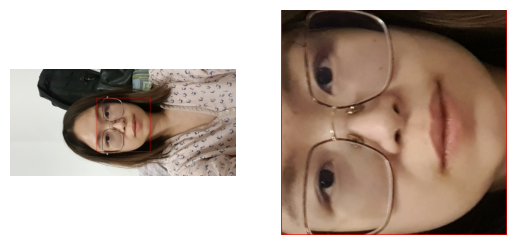

In [ ]:
img = mp.Image.create_from_file(dataset.path.sample(1).iloc[0])
results = detector.detect(img)

img = np.copy(img.numpy_view())
for det in results.detections:
	x = det.bounding_box.origin_x
	y = det.bounding_box.origin_y
	w = det.bounding_box.width
	h = det.bounding_box.height

	cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 3)
	plt.figure()
	plt.subplot(1,2,1)
	plt.imshow(img)
	plt.axis('off')
	plt.subplot(1,2,2)
	plt.imshow(img[y:y+h,x:x+w])
	plt.axis('off')

In [ ]:
# create paths for output
if not os.path.exists(DATASET_OUTPUT.data): os.makedirs(DATASET_OUTPUT.data)
if not os.path.exists(os.path.join(DATASET_OUTPUT.data, 'rejected')): os.makedirs(os.path.join(DATASET_OUTPUT.data, 'rejected'))

# create dataset
faces_dataset = pd.DataFrame(columns=dataset.columns)

count = 0
def process(entry):
	global count
	img = mp.Image.create_from_file(entry.path)
	det = detector.detect(img).detections
    
	if len(det) <= 0: # no face detected
		print(entry.path)
		cv2.imwrite(os.path.join(DATASET_OUTPUT.data, 'rejected',f'{count:3}.png'), cv2.cvtColor(img.numpy_view(), cv2.COLOR_BGR2RGB))
		count+=1
		return

	# extract values
	bb = det[0].bounding_box
	x = bb.origin_x
	y = bb.origin_y
	w = bb.width
	h = bb.height

	# add entry to dataset & save image to directory
	faces_dataset.loc[len(faces_dataset)] = [ entry.setid,os.path.join(DATASET_OUTPUT.data, f'{count:3}.png')]
	cv2.imwrite(os.path.join(DATASET_OUTPUT.data, f'{count:3}.png'), cv2.cvtColor(img.numpy_view()[y:y+h,x:x+w], cv2.COLOR_BGR2RGB))

	count+=1

dataset.apply(process, axis=1) # apply function
faces_dataset.to_csv(DATASET_OUTPUT.info, index=False) # save dataset to csv

data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab21f4277a1c323b746383_age_23_name_Andrea Ran/ID_2.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/ID_2.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_2.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_7.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_4.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_6.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_8.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_13.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b